# PART 1

In [91]:
#Import the housing data as a data frame and ensure that the data is loaded properly.
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
housing =  pd.read_csv("House Prices.csv")
housing.head(6)

C:\Users\atanu\AppData\Local\Temp\ipykernel_8364\3274470226.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [92]:
#Drop the "Id" column and any features that are missing more than 40% of their values.
#housing.isnull().mean()

In [93]:
housing.shape

(1460, 81)

In [94]:
housing = housing.loc[:, housing.isnull().mean() < .4].drop('Id', axis=1)

In [95]:
housing.shape

(1460, 75)

In [96]:
#For numerical columns, fill in any missing data with the median value.


In [97]:
numCols = housing.select_dtypes("number").columns
catCols = housing.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

In [98]:
numCols

['LotArea',
 'OpenPorchSF',
 'BsmtUnfSF',
 'YearBuilt',
 '2ndFlrSF',
 'BsmtFullBath',
 'MoSold',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'SalePrice',
 '3SsnPorch',
 'TotalBsmtSF',
 'MSSubClass',
 'MasVnrArea',
 'BedroomAbvGr',
 'GarageYrBlt',
 'YearRemodAdd',
 'WoodDeckSF',
 'OverallQual',
 'TotRmsAbvGrd',
 'FullBath',
 'EnclosedPorch',
 'OverallCond',
 'GarageArea',
 'ScreenPorch',
 'BsmtHalfBath',
 'YrSold',
 'LotFrontage',
 '1stFlrSF',
 'GrLivArea',
 'MiscVal',
 'BsmtFinSF2',
 'LowQualFinSF',
 'GarageCars',
 'BsmtFinSF1',
 'PoolArea']

In [99]:
catCols

['LotShape',
 'Exterior1st',
 'KitchenQual',
 'Electrical',
 'Functional',
 'RoofStyle',
 'SaleType',
 'Foundation',
 'RoofMatl',
 'SaleCondition',
 'HeatingQC',
 'MSZoning',
 'Heating',
 'HouseStyle',
 'ExterCond',
 'GarageType',
 'BsmtCond',
 'ExterQual',
 'GarageCond',
 'Condition1',
 'BldgType',
 'GarageFinish',
 'BsmtExposure',
 'Neighborhood',
 'Street',
 'BsmtFinType1',
 'GarageQual',
 'LandSlope',
 'MasVnrType',
 'CentralAir',
 'BsmtFinType2',
 'PavedDrive',
 'LotConfig',
 'Condition2',
 'Exterior2nd',
 'LandContour',
 'BsmtQual',
 'Utilities']

In [100]:
housing.fillna(housing.select_dtypes(include='number').mean().iloc[0], inplace=True)

In [11]:
#For categorical columns, fill in any missing data with the most common value (mode).
housing.fillna(housing.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [12]:
housing.isnull().mean()

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [13]:
#Convert the categorical columns to dummy variables.
housing = pd.get_dummies(housing, columns=catCols)

In [14]:
#Split the data into a training and test set, where the SalePrice column is the target.
Y_col = 'SalePrice'
X_cols = housing.loc[:, housing.columns != Y_col].columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing[X_cols], housing[Y_col],test_size=0.2, random_state=42)

In [15]:
#Run a linear regression and report the R2-value and RMSE on the test set.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
print(regressor.intercept_)

-627800.9493669813


In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds.head(5))

      Actual      Predicted
892   154500  156120.076580
1105  325000  349533.380451
413   115000  90297.150684 
522   159000  178311.317457
1036  315500  325806.989043


In [19]:
from sklearn.metrics import r2_score,mean_squared_error
#R2
r2 = r2_score(y_test, y_pred)
print("R2 : "+ str(r2))
#RMSE

rmse = mean_squared_error(y_test, y_pred , squared=False)
print("RSME : "+ str(rmse))

R2 : 0.8863164845893794
RSME : 29529.47083134482


In [20]:
#Fit and transform the training features with a PCA so that 90% of the variance is retained 

#Standardize the Data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

pca = PCA(n_components=0.9, whiten=True)
#conduct PCA
X_train = pca.fit_transform(X_train)


In [21]:
#How many features are in the PCA-transformed matrix?
print("Reduced number of features : ", X_train.shape[1])

Reduced number of features :  141


In [22]:
 #Transform but DO NOT fit the test features with the same PCA

X_test = sc.transform(X_test)
X_test = pca.transform(X_test)

In [23]:
print("Reduced number of features : ", X_test.shape[1])

Reduced number of features :  141


In [24]:
#Repeat step 7 with your PCA transformed data.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred_ = regressor.predict(X_test)

In [26]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_.squeeze()})
print(df_preds.head(5))

      Actual      Predicted
892   154500  149067.320131
1105  325000  340489.284030
413   115000  82922.232665 
522   159000  166588.373176
1036  315500  347153.345316


In [27]:
from sklearn.metrics import r2_score,mean_squared_error
#R2
r2 = r2_score(y_test, y_pred_)
print("R2 : "+ str(r2))
#RMSE

rmse = mean_squared_error(y_test, y_pred_ , squared=False)
print("RSME : "+ str(rmse))

R2 : 0.8527877475017905
RSME : 33603.06531190368


In [78]:
#Take your original training features (from step 6) and apply a min-max scaler to them.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(housing[X_cols], housing[Y_col],test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_train.shape

(1168, 281)

In [79]:
#Find the min-max scaled features in your training set that have a variance above 0.1 
#create thresholder
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=0.1)
X_train = thresholder.fit_transform(X_train)
X_train.shape

(1168, 50)

In [80]:
#Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.
X_test = scaler.transform(X_test)
X_test = thresholder.transform(X_test)
X_test.shape

(292, 50)

In [81]:
#Repeat step 7 with the high variance data.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred_ = regressor.predict(X_test)

In [83]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred_.squeeze()})
print(df_preds.head(5))

      Actual      Predicted
892   154500  190924.161083
1105  325000  273260.362163
413   115000  78344.887024 
522   159000  118829.871276
1036  315500  336484.231933


In [84]:
#R2
r2 = r2_score(y_test, y_pred_)
print("R2 : "+ str(r2))
#RMSE

rmse = mean_squared_error(y_test, y_pred_ , squared=False)
print("RSME : "+ str(rmse))

R2 : 0.6638118819043848
RSME : 50780.631472774316


#Features with low variance are likely less interesting (and useful) than features with high variance, as we have selected the variance with threshold 0.1 and above, this is not fitting the model well so the RSME has increased and lot and R2 decreased.

# PART 2

In [149]:
import numpy as np
mushroom = pd.read_csv("mushrooms.csv")
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [150]:
#Convert the categorical features (all of them) to dummy variables.
numCols = mushroom.select_dtypes("number").columns
catCols = mushroom.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

In [151]:
numCols

[]

In [152]:
catCols.remove('class')
catCols

['stalk-root',
 'stalk-surface-above-ring',
 'veil-color',
 'habitat',
 'bruises',
 'gill-attachment',
 'spore-print-color',
 'gill-color',
 'gill-spacing',
 'odor',
 'stalk-shape',
 'cap-shape',
 'ring-type',
 'stalk-color-below-ring',
 'ring-number',
 'stalk-color-above-ring',
 'population',
 'cap-color',
 'veil-type',
 'stalk-surface-below-ring',
 'gill-size',
 'cap-surface']

In [153]:
mushroom = pd.get_dummies(mushroom, columns=catCols)
mushroom.head(4)

,class,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,bruises_f,bruises_t,gill-attachment_a,gill-attachment_f,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,gill-spacing_c,gill-spacing_w,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk-shape_e,stalk-shape_t,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-number_n,ring-number_o,ring-number_t,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,population_a,population_c,population_n,population_s,population_v,population_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,veil-type_p,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,gill-size_b,gill-size_n,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
0,p,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,e,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0
2,e,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
3,p,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1


In [154]:
#Split the data into a training and test set.
Y_col = 'class'
X_cols = mushroom.loc[:, mushroom.columns != Y_col].columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mushroom[X_cols], mushroom[Y_col],test_size=0.2, random_state=42)

In [155]:
#Fit a decision tree classifier on the training set.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
# Here call it somehing else!
y_pred = clf.predict(X_test)


In [156]:
#Report the accuracy and create a confusion matrix for the model prediction on the test set.
# Compute accuracy based on test samples
from sklearn.metrics import accuracy_score, confusion_matrix  
acc = accuracy_score(y_test, y_pred)
print("Accuracy : ", acc)

Accuracy :  1.0


In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[843   0]
 [  0 782]]


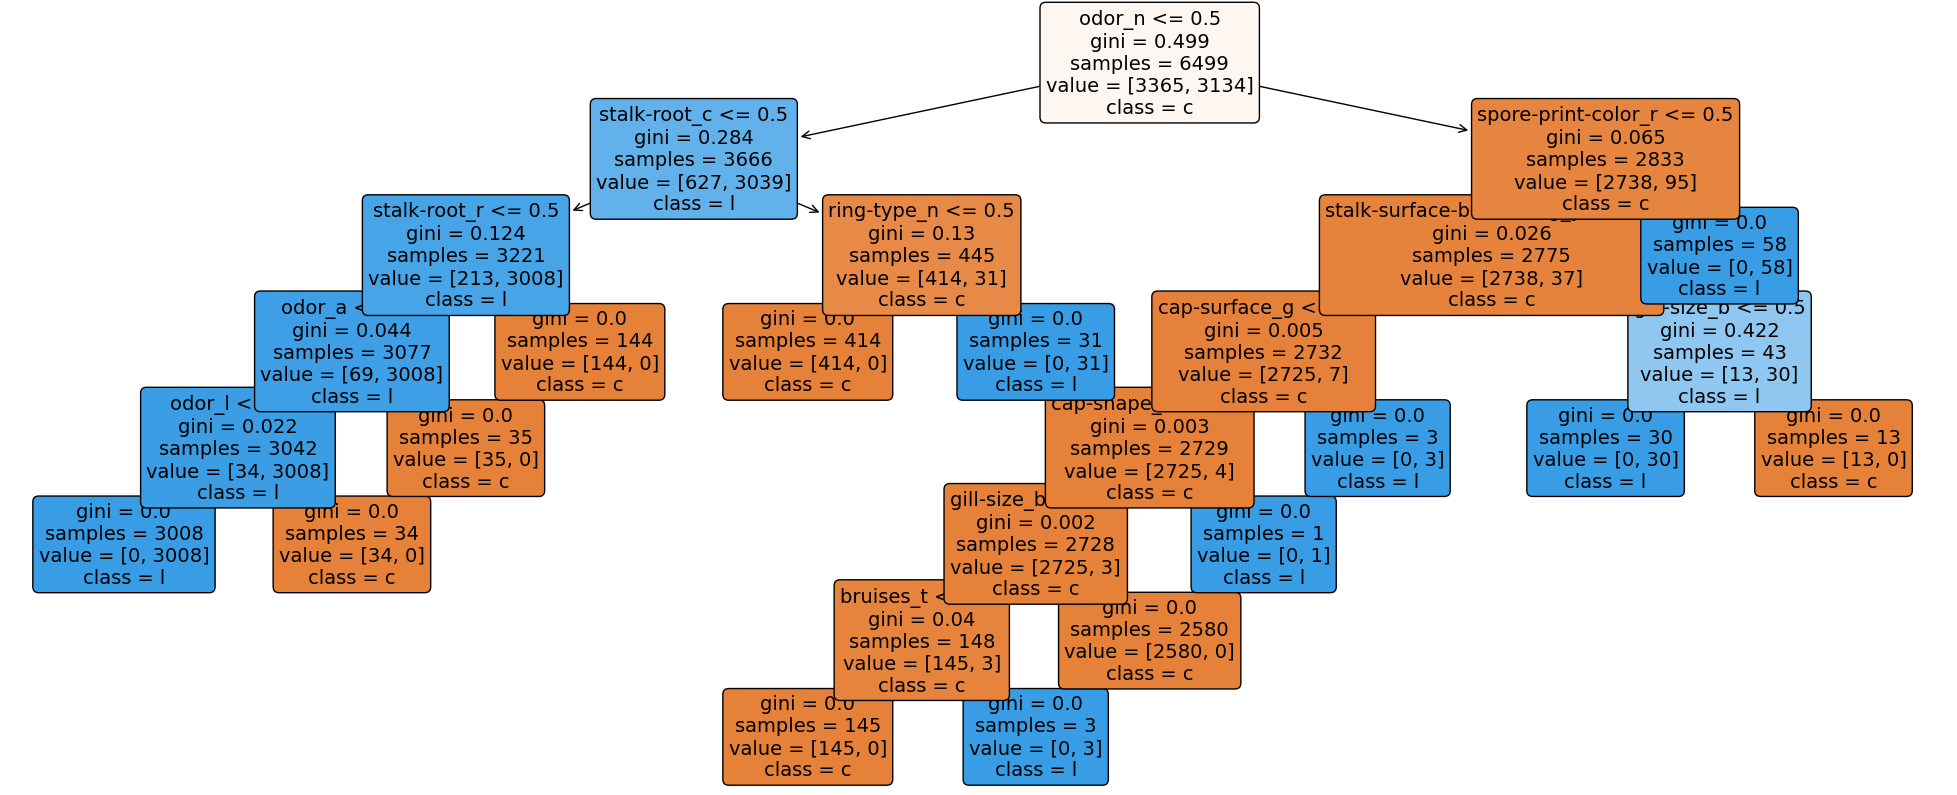

In [158]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X_train.columns, 
              class_names='class', 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [159]:
#Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select = SelectKBest(score_func=chi2, k=5)
z = select.fit_transform(X_train, y_train)

z.shape

(6499, 5)

In [164]:
#Which five features were selected in step 7? Hint: Use the get_support function.
filter = select.get_support()
features = X_train.columns
print("Selected best 5:")
print(features[filter])

Selected best 5:
Index(['stalk-surface-above-ring_k', 'gill-color_b', 'odor_f', 'odor_n',
       'stalk-surface-below-ring_k'],
      dtype='object')


In [172]:
#repeat 4 and 5
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(z,y_train)
# Here call it somehing else!
y_pred = clf.predict(X_test[features[filter]])


C:\Users\atanu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [173]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy : ", acc)

Accuracy :  0.9267692307692308


In [174]:
con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

[[843   0]
 [119 663]]
